# OpenCV 

Az OpenCV egy a számítógépes látás és képfeldolgozás területén elterjedt és népszerű könyvtárcsomag. C/C++ nyelven íródott, de több különféle programozási környezetben is elérhető, többek között Python alatt is.

Az OpenCV használatához telepíteni kell az OpenCV, NumPy és Matplotlib csomagokat.

A csomag használatához importálni kell a csomagot.

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

# Olvasás, módosítás, megjelenítés, írás

In [2]:
img = cv2.imread(os.path.join("data", "coffee.jpg"))

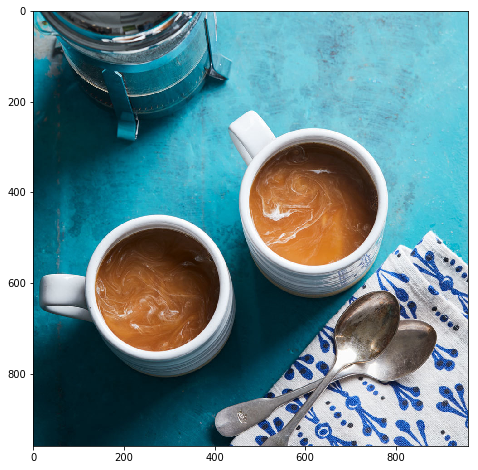

In [3]:
plt.figure(1, figsize=(12,8))
if os.name == "nt": # Windowson RGB helyett BGR-ként jelzi ki, fordítsuk meg
    plt.imshow(img[:,:,::-1])
else: # Linuxon RGB a sorrend
    plt.imshow(img)
plt.show()

Az OpenCV használatához azért szükséges a Numpy, mert a képeket Numpy tömb formájában tárolja. Ezt jól szemléltetik a következők is.

In [4]:
img # A kimeneten látható, hogy egy 3 dimenziós Numpy tömbben tárolja a képet.

array([[[133, 108,  38],
        [161, 140,  48],
        [192, 175,  55],
        ...,
        [221, 203, 112],
        [222, 205, 112],
        [223, 206, 113]],

       [[134, 109,  39],
        [162, 141,  50],
        [192, 174,  57],
        ...,
        [221, 203, 112],
        [222, 205, 112],
        [222, 205, 112]],

       [[136, 114,  43],
        [163, 143,  55],
        [194, 174,  62],
        ...,
        [220, 202, 111],
        [220, 203, 110],
        [221, 204, 111]],

       ...,

       [[ 61,  49,   1],
        [ 61,  49,   1],
        [ 60,  48,   0],
        ...,
        [227, 222, 219],
        [220, 215, 212],
        [230, 225, 222]],

       [[ 62,  50,   2],
        [ 62,  50,   2],
        [ 61,  49,   1],
        ...,
        [231, 226, 223],
        [239, 234, 231],
        [229, 224, 221]],

       [[ 63,  51,   3],
        [ 63,  51,   3],
        [ 62,  50,   2],
        ...,
        [223, 218, 215],
        [232, 227, 224],
        [217, 212, 209]]

A dimenziók mérete megadja a kép magasságát (184), szélességét (274), illetve a színcsatornák számát (3). Ez utóbbi jelen esetben 3, hiszen RGB térben vannak a leképezve a színek.

In [5]:
img.shape

(960, 960, 3)

In [6]:
print("A vizsgált kép ", img.shape[0], " képpont magas és ",
      img.shape[1], " képpont széles. A színcsatornák száma ", img.shape[2], ".", sep="")

A vizsgált kép 960 képpont magas és 960 képpont széles. A színcsatornák száma 3.


Mivel a kép egy Numpy tömb, a megszokott módon tudjuk tömbként kezelni. Például módosíthatjuk az egyes képpontok értékeit.

In [7]:
for i in range(0, img.shape[0]):
    for j in range(0, img.shape[1]):
        img[i, j, 2] = 0 # Minden képpont esetén az utolsó színkomponens (vörös) értékét nullára állítja.

A képet a következő módon menthetjük a kívánt formátumban.

In [8]:
cv2.imwrite("out0.png", img)
cv2.imwrite("out0.jpg", img)
cv2.imwrite("out0.bmp", img)

True

# Színcsatornák (konvertálás, komponensekre bontás)

A bemeneti RGB képet szürkeárnyalatos képpé konvertáljuk.

In [9]:
img = cv2.imread(os.path.join("data", "coffee.jpg"))
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

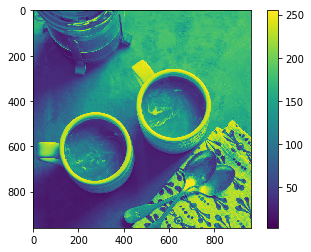

In [10]:
plt.imshow(img_gray)
plt.colorbar()
plt.show()

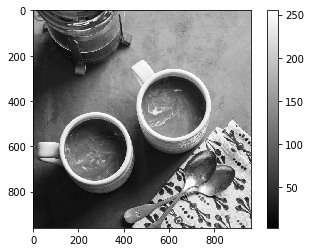

In [11]:
plt.imshow(img_gray, cmap = "gray")
plt.colorbar()
plt.show()

Látható, hogy a kép színcsatornáinak száma háromról egyre változott a konvertálás következtében.

In [12]:
img.shape

(960, 960, 3)

In [13]:
img_gray.shape

(960, 960)

Lehetőség van színcsatornákra bontani a képet.

In [14]:
b, g, r = cv2.split(img)

De az eddigiek alapján tudjuk, hogy ez például így is működik:

In [15]:
b = img[:, :, 2]
g = img[:, :, 1]
r = img[:, :, 0]

A három színcsatorna intenzitásának megjelenítése szürkeárnyalatos képként.

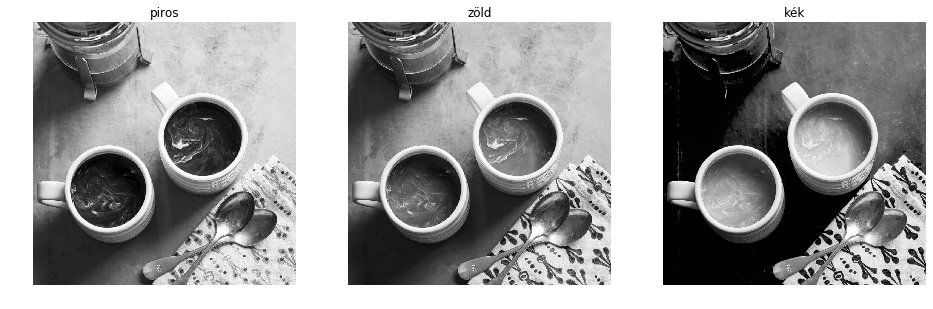

In [16]:
plt.figure(2, figsize=(16, 6))
plt.subplot(131), plt.title("piros"), plt.imshow(r, cmap = "gray"), plt.axis("off")
plt.subplot(132), plt.title("zöld"), plt.imshow(g, cmap = "gray"), plt.axis("off")
plt.subplot(133), plt.title("kék"), plt.imshow(b, cmap = "gray"), plt.axis("off")
plt.show()

Az értékek megjelenítése az RGB térben:

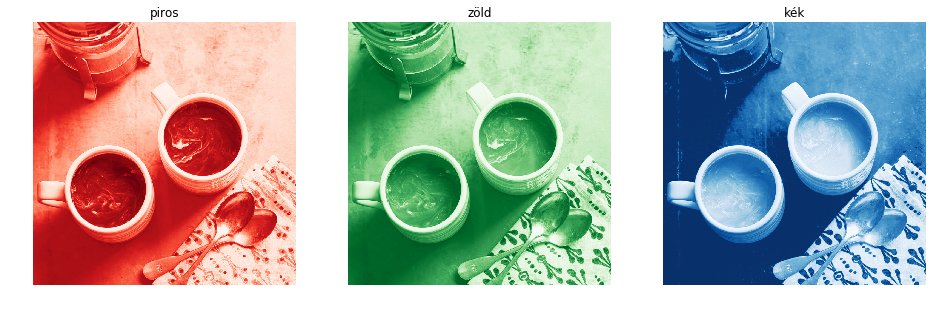

In [17]:
plt.figure(3, figsize=(16, 6))
plt.subplot(131), plt.title("piros"), plt.imshow(r, cmap = "Reds_r"), plt.axis("off")
plt.subplot(132), plt.title("zöld"), plt.imshow(g, cmap = "Greens_r"), plt.axis("off")
plt.subplot(133), plt.title("kék"), plt.imshow(b, cmap = "Blues_r"), plt.axis("off")
plt.show()

# Hisztogram

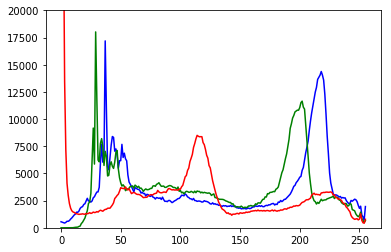

In [18]:
histogram2 = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(histogram2, color = "b")
histogram2 = cv2.calcHist([img], [1], None, [256], [0, 256])
plt.plot(histogram2, color = "g")
histogram2 = cv2.calcHist([img], [2], None, [256], [0, 256])
plt.plot(histogram2, color = "r")
plt.ylim([0, 20000])
plt.show()

# Élkiemelés

In [19]:
kernel0 = np.array([[-1,-2,-1], 
                    [0,0,-0], 
                    [1,2,1]])

filtered_img0 = cv2.filter2D(img, -1, kernel0)

kernel1 = np.array([[1,0,-1], 
                    [2,0,-2], 
                    [1,0,-1]])

filtered_img1 = cv2.filter2D(img, -1, kernel1)

#filtered_img_sum = (filtered_img0 + filtered_img1)
filtered_img_sum = cv2.add(filtered_img0, filtered_img1)

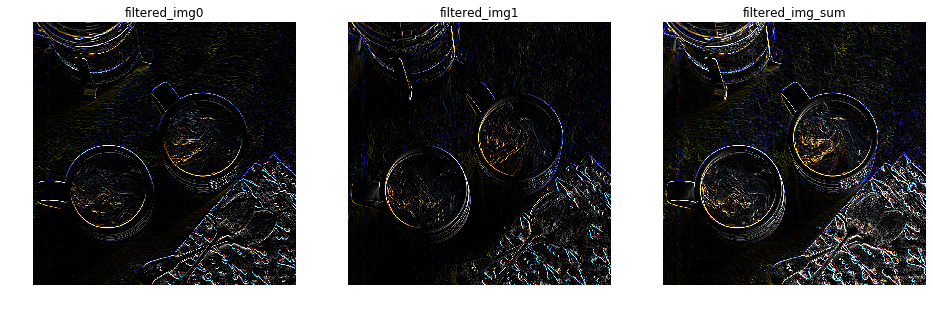

In [20]:
plt.figure(4, figsize=(16, 6))
plt.subplot(131), plt.title("filtered_img0"), plt.imshow(filtered_img0), plt.axis("off")
plt.subplot(132), plt.title("filtered_img1"), plt.imshow(filtered_img1), plt.axis("off")
plt.subplot(133), plt.title("filtered_img_sum"), plt.imshow(filtered_img_sum), plt.axis("off")
plt.show()

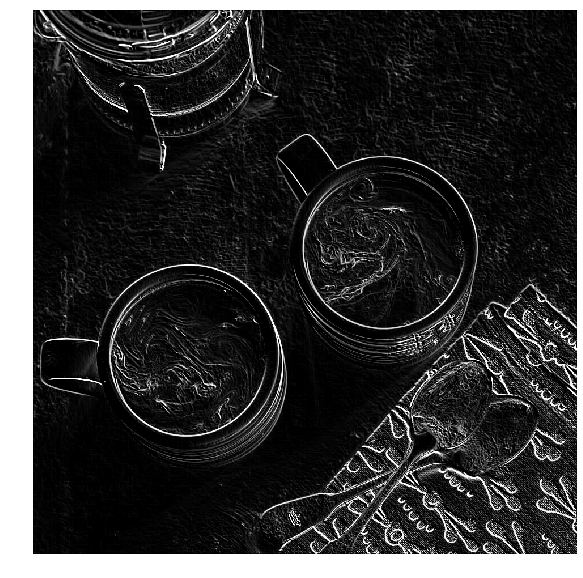

In [21]:
filtered_img_sum_gray = cv2.cvtColor(filtered_img_sum, cv2.COLOR_BGR2GRAY)
plt.figure(5, figsize=(10, 10))
plt.imshow(filtered_img_sum_gray, cmap = "gray"), plt.axis("off")
plt.show()

# Élesítés

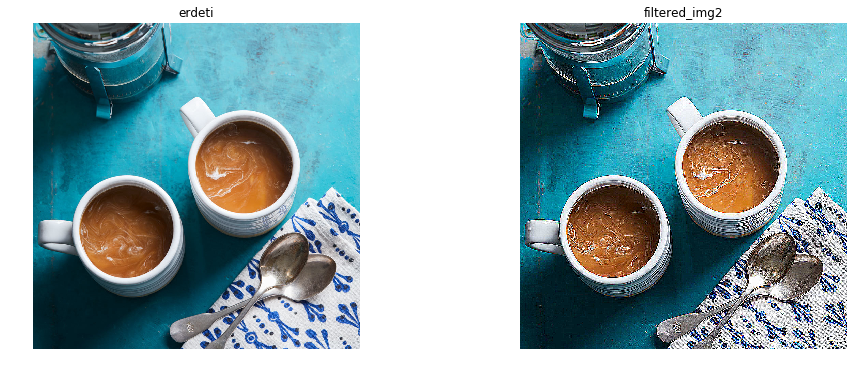

In [22]:
kernel = np.array([[-1,-1,-1], 
                    [-1,9,-1], 
                    [-1,-1,-1]])

filtered_img2 = cv2.filter2D(img, -1, kernel)

plt.figure(6, figsize=(16, 6))
plt.subplot(121), plt.imshow(img[:,:,::-1]), plt.axis("off"), plt.title("erdeti")
plt.subplot(122), plt.imshow(filtered_img2[:,:,::-1]), plt.axis("off"), plt.title("filtered_img2")
plt.show()

# Küszöbölés

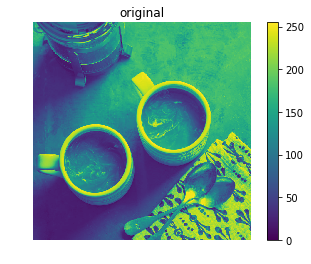

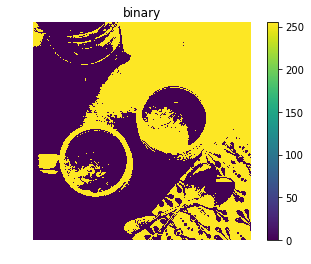

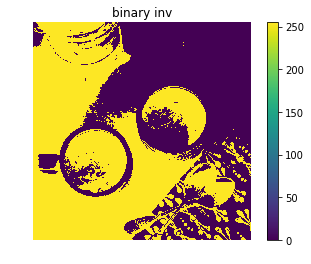

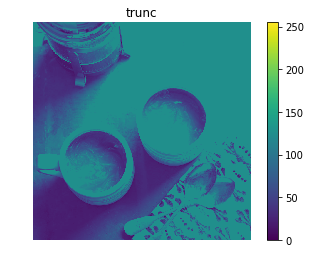

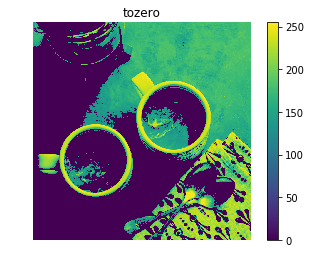

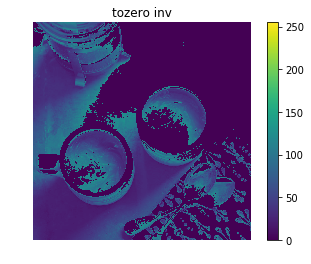

(<matplotlib.image.AxesImage at 0x1ce486121d0>,
 Text(0.5, 1.0, 'tozero inv'),
 (-0.5, 959.5, 959.5, -0.5),
 None)

In [23]:
# Megnyitás szürkeárnyalati konverzióval
img = cv2.imread(os.path.join("data", "coffee.jpg"), 0)
plt.imshow(img, vmin = 0, vmax = 255), plt.title("original"), plt.colorbar(), plt.axis("off"), plt.show()

# Aminek az intenzitása 127 alatti, az 0 intezitást vesz fel, minden más intenzitása 255 lesz.
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
plt.imshow(thresh1, vmin = 0, vmax = 255), plt.title("binary"), plt.colorbar(), plt.axis("off"), plt.show()

# Az előző inverze.
ret, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh2, vmin = 0, vmax = 255), plt.title("binary inv"), plt.colorbar(), plt.axis("off"), plt.show()

# Ahol az intenzitás 127 feletti, ott 127 lesz az új intenzitás.
ret, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
plt.imshow(thresh3, vmin = 0, vmax = 255), plt.title("trunc"), plt.colorbar(), plt.axis("off"), plt.show()

# Ahol az intenzitás 127 alatti, ott 0 lesz az új intenzitás.
ret, thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
plt.imshow(thresh4, vmin = 0, vmax = 255), plt.title("tozero"), plt.colorbar(), plt.axis("off"), plt.show()

# Az előző inverze.
ret, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)
plt.imshow(thresh5, vmin = 0, vmax = 255), plt.title("tozero inv"), plt.colorbar(), plt.axis("off"), plt.show()

# Morfológiai operátorok (Erózió, dilatáció, nyitás és zárás)

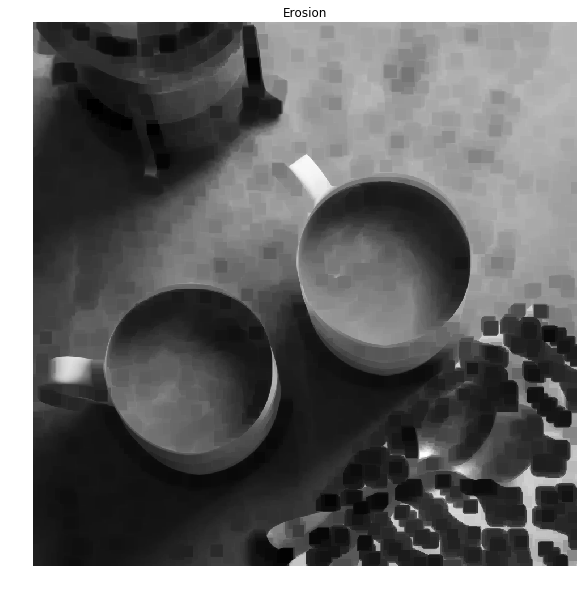

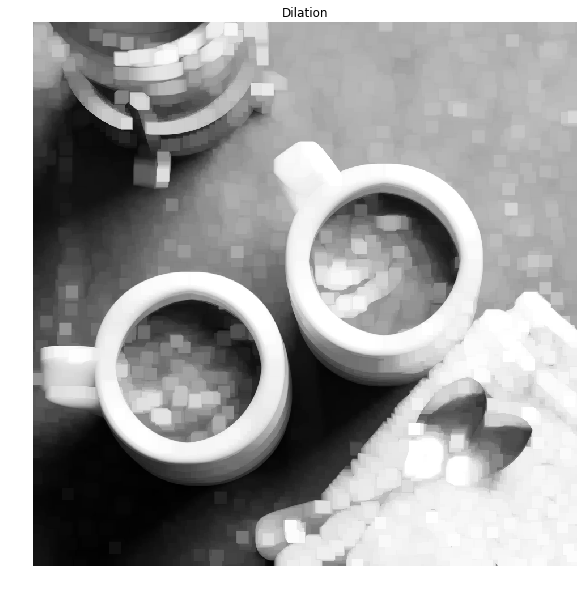

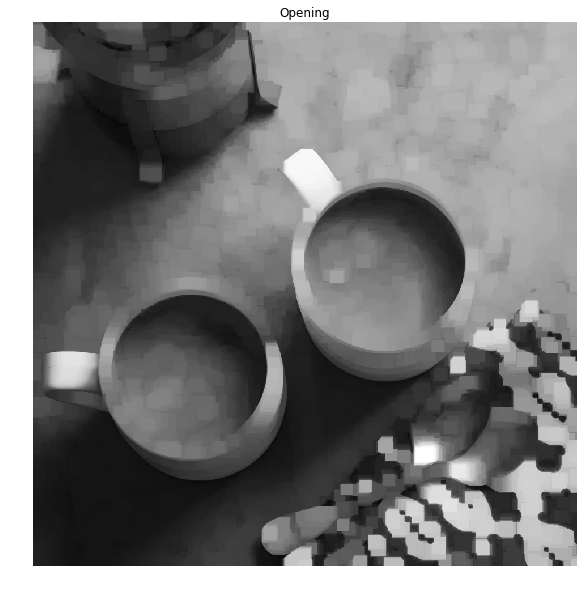

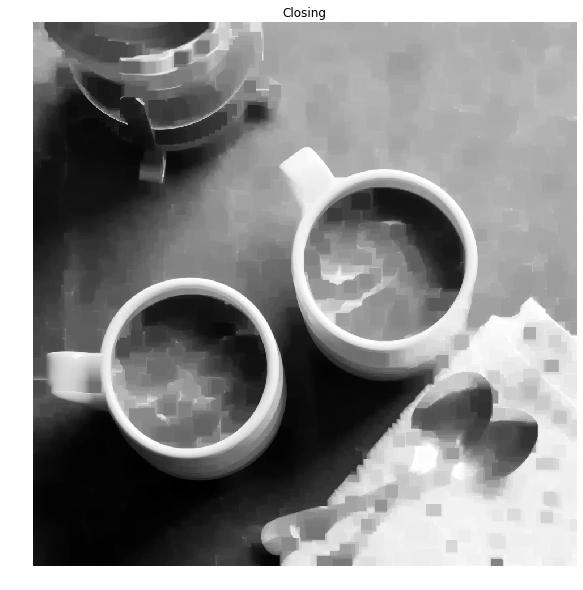

(<matplotlib.image.AxesImage at 0x1ce484f9940>,
 Text(0.5, 1.0, 'Closing'),
 (-0.5, 959.5, 959.5, -0.5),
 None)

In [24]:
image = cv2.imread(os.path.join("data", "coffee.jpg"), 0)

# Morfológiai szűrő
kernel = np.ones((20,20), np.uint8)

# Erózió
plt.figure(figsize = (10,10))
erosion = cv2.erode(image, kernel, iterations = 1)
plt.imshow(erosion, cmap = "gray"), plt.title("Erosion"), plt.axis("off"), plt.show()

# Dilatáció
plt.figure(figsize = (10,10))
dilation = cv2.dilate(image, kernel, iterations = 1)
plt.imshow(dilation, cmap = "gray"), plt.title("Dilation"), plt.axis("off"), plt.show()

# Nyitás
plt.figure(figsize = (10,10))
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
plt.imshow(opening, cmap = "gray"), plt.title("Opening"), plt.axis("off"), plt.show()

# Zárás
plt.figure(figsize = (10,10))
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing, cmap = "gray"), plt.title("Closing"), plt.axis("off"), plt.show()

# Képek összeadása és kivonása

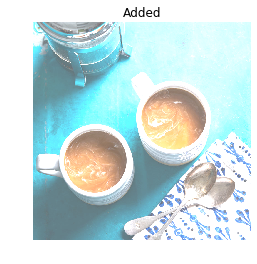

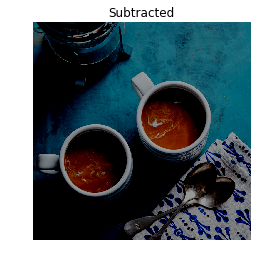

(<matplotlib.image.AxesImage at 0x1ce485ca6a0>,
 Text(0.5, 1.0, 'Subtracted'),
 (-0.5, 959.5, 959.5, -0.5),
 None)

In [25]:
img = cv2.imread(os.path.join("data", "coffee.jpg"))

# Az M mátrix mérete megegyezik a bemeneti kép méretével. Minden intenzitása 100. Végeredményben M is egy képnek tekinthető.
M = np.ones(img.shape, dtype = "uint8") * 100 

# M mátrix és a kép összege.
added = cv2.add(img, M)
plt.imshow(added[:,:,::-1]), plt.title("Added"), plt.axis("off"), plt.show()

# M mátrix és a kép különbsége.
subtracted = cv2.subtract(img, M)
plt.imshow(subtracted[:,:,::-1]), plt.title("Subtracted"), plt.axis("off"), plt.show()
